In [1]:
import pandas as pd
import numpy as np
import os, pdb, sys
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('prepared_data.csv')
df.head()

,yr,state,state_ansi,county,county_ansi,key,animal_expense_usd,animal_sales_usd,crop_sales_usd,cropland_insured_acres,ccc_loan_receipts_usd,irrigated_acres,fertilizer_treated_acres,conservation_acres,total_land_area_acres,operated_acres,num_operations,operations_w_sales,sales_usd,operations_w_income,farm_related_income_usd,gov_programs_receipts_usd,operations_w_gov_programs,net_income_usd_per_operation,net_income_usd,expenses_usd,expenses_per_operation,animal_expense_div_by_animal_sales,pct_animal_sales,pct_crop_sales,pct_acres_insured,pct_sales_ccc_loans,pct_acres_irrigated,pct_acres_fertilized,pct_acres_conserved,pct_acres_operated,pct_operations_with_sales,pct_ops_w_gov_programs,expense_ratio,expenses_div_net_income
0,2022,ALABAMA,1,AUTAUGA,1,2022-1-1,1138000.0,10638000.0,29212000.0,17522.0,0.0,2442.0,27161.0,1211.0,380447.0,353.0,104722.0,353.0,39850000.0,75.0,724000.0,350000.0,31.0,29477.0,10405000.0,30519000.0,86455.0,0.106975,0.266951,0.733049,0.046056,0.000000,0.006419,0.071392,0.003183,0.000928,0.003371,0.000296,0.765847,2.933109
1,2022,ALABAMA,1,BULLOCK,11,2022-1-11,2698000.0,10641000.0,36100000.0,11266.0,0.0,1835.0,7072.0,3222.0,398596.0,250.0,172924.0,250.0,46741000.0,106.0,5946000.0,366000.0,25.0,60728.0,15182000.0,37871000.0,151484.0,0.253548,0.227659,0.772341,0.028264,0.000000,0.004604,0.017742,0.008083,0.000627,0.001446,0.000145,0.810231,2.494467
2,2022,ALABAMA,1,DALLAS,47,2022-1-47,4955000.0,37623000.0,40553000.0,48193.0,1482000.0,8180.0,49197.0,5733.0,626378.0,398.0,223331.0,398.0,78177000.0,173.0,3763000.0,1321000.0,93.0,40629.0,16170000.0,67091000.0,168570.0,0.131701,0.481254,0.518733,0.076939,0.018957,0.013059,0.078542,0.009153,0.000635,0.001782,0.000416,0.858194,4.149103
3,2022,ALABAMA,1,ELMORE,51,2022-1-51,641000.0,4663000.0,24592000.0,23520.0,0.0,3003.0,31927.0,1189.0,395804.0,478.0,80066.0,478.0,29255000.0,104.0,1345000.0,769000.0,30.0,4837.0,2312000.0,29057000.0,60789.0,0.137465,0.159392,0.840608,0.059423,0.000000,0.007587,0.080664,0.003004,0.001208,0.005970,0.000375,0.993232,12.567907
4,2022,ALABAMA,1,GREENE,63,2022-1-63,2220000.0,26143000.0,2405000.0,5207.0,0.0,58.0,4920.0,1162.0,414095.0,243.0,107845.0,243.0,28548000.0,106.0,1843000.0,196000.0,26.0,12876.0,3129000.0,27458000.0,112997.0,0.084918,0.915756,0.084244,0.012574,0.000000,0.000140,0.011881,0.002806,0.000587,0.002253,0.000241,0.961819,8.775328


In [2]:
keeps = ['yr', 'state', 'county', 'key', 'animal_expense_div_by_animal_sales', 'pct_animal_sales', 'pct_crop_sales', 'pct_acres_insured', 
         'pct_sales_ccc_loans', 'pct_acres_irrigated', 'pct_acres_fertilized', 'pct_acres_conserved', 'pct_acres_operated', 
         'pct_ops_w_gov_programs', 'expense_ratio', 'expenses_div_net_income']
df = df[keeps]
df.head()

,yr,state,county,key,animal_expense_div_by_animal_sales,pct_animal_sales,pct_crop_sales,pct_acres_insured,pct_sales_ccc_loans,pct_acres_irrigated,pct_acres_fertilized,pct_acres_conserved,pct_acres_operated,pct_ops_w_gov_programs,expense_ratio,expenses_div_net_income
0,2022,ALABAMA,AUTAUGA,2022-1-1,0.106975,0.266951,0.733049,0.046056,0.000000,0.006419,0.071392,0.003183,0.000928,0.000296,0.765847,2.933109
1,2022,ALABAMA,BULLOCK,2022-1-11,0.253548,0.227659,0.772341,0.028264,0.000000,0.004604,0.017742,0.008083,0.000627,0.000145,0.810231,2.494467
2,2022,ALABAMA,DALLAS,2022-1-47,0.131701,0.481254,0.518733,0.076939,0.018957,0.013059,0.078542,0.009153,0.000635,0.000416,0.858194,4.149103
3,2022,ALABAMA,ELMORE,2022-1-51,0.137465,0.159392,0.840608,0.059423,0.000000,0.007587,0.080664,0.003004,0.001208,0.000375,0.993232,12.567907
4,2022,ALABAMA,GREENE,2022-1-63,0.084918,0.915756,0.084244,0.012574,0.000000,0.000140,0.011881,0.002806,0.000587,0.000241,0.961819,8.775328


In [6]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df[keeps[4:]].fillna(0))

PCA()

In [13]:
print(pca.explained_variance_ratio_)
pca_result = pca.fit_transform(df[keeps[4:]].fillna(0))
pca_result.shape

# df['pc1'] = pca_result[0]
# df['pc2'] = pca_result[1]
# df['pc3'] = pca_result[2]

[9.99930568e-01 4.37263446e-05 1.58157083e-05 5.81093905e-06
 2.21451347e-06 1.40618004e-06 2.35108334e-07 1.73903107e-07
 4.03725402e-08 9.01321025e-09 9.35175438e-11 6.34184040e-11]


(9210, 12)

In [15]:
df['pc1'] = [i[0] for i in pca_result]
df['pc2'] = [i[1] for i in pca_result]
df['pc3'] = [i[2] for i in pca_result]


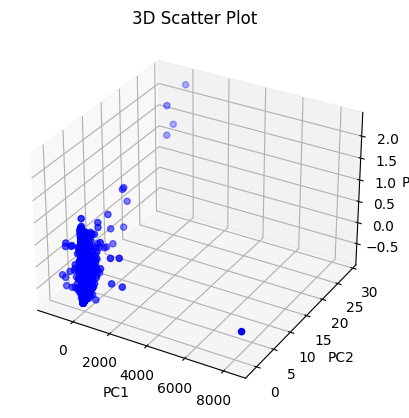

In [17]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pc1'], df['pc2'], df['pc3'], c='b', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot')

plt.show()

In [18]:
df.to_csv('prepared_data_pca.csv', index = None)